# Algorithms and mathematics of machine learning
## Laboratory 2

To complete the tasks, please familiarize yourself with the methods, properties, and functions:
`__repr__`, `__str__`, `__add__`, `__sub__`, `__eq__`, `__lt__`, `__gt__`, `__le__`, `__ge__`, `__ne__`, `__hash__`, `__truediv__`, `__mul__ `, `__class__`, `__name__`, `id`.

Operators: https://docs.python.org/3/library/operator.html

> NOTE: Please do not use external modules/libraries (except the _matplotlib_ library) in this lab.

> NOTE 2: Error handling should be implemented as exceptions.

### Task 1

Write a `Vector` class providing the functionality:
- represents a vector of any length,
- an object initialized with a list (e.g. `Vector([1, 2, 3])`,
- has a function that returns the modulus of the vector,
- allows adding (`+`) and subtracting (`-`) vectors. Add error handling (different length (number of elements) of the vector),
- ability to display a vector as a list using the `print(v)` function (`__str__` method),
- running a cell containing only the name of a variable (type `Vector`) will display the name of type `Vector`, the address of the variable in memory (function `id`) and its content, e.g. `<Vector([1, 2, 3]) at 140185630442880>` (`__repr__` method)

In [1]:
from typing import Union
from math import sqrt
from matplotlib.pyplot import arrow, show


class Vector:
    __data: list = None

    def __init__(self, data: list) -> None:
        self.__data = data

    def __len__(self) -> int:
        return len(self.__data)

    def __add__(self, data: 'Vector') -> 'Vector':
        self.__validate_length_of_vectors(data)

        for i in range(len(self.__data)):
            self.__data[i] += data.to_list()[i]

        return self

    def __sub__(self, data: 'Vector') -> 'Vector':
        self.__validate_length_of_vectors(data)

        for i in range(len(self.__data)):
            self.__data[i] -= data.to_list()[i]

        return self

    def __str__(self) -> str:
        return f'{self.__data}'

    def __repr__(self) -> str:
        return f'<{self.__class__.__name__}({self.__data}) at {hex(id(self))}>'

    def __eq__(self, data: 'Vector') -> 'Vector':
        self.__validate_length_of_vectors(data)
        return Vector([value1 == value2 for value1, value2 in zip(self.__data, data.to_list())])

    def __lt__(self, data: 'Vector') -> 'Vector':
        self.__validate_length_of_vectors(data)
        return Vector([value1 < value2 for value1, value2 in zip(self.__data, data.to_list())])
        
    def __gt__(self, data: 'Vector') -> 'Vector':
        self.__validate_length_of_vectors(data)
        return Vector([value1 > value2 for value1, value2 in zip(self.__data, data.to_list())])
    
    def __le__(self, data: 'Vector') -> 'Vector':
        self.__validate_length_of_vectors(data)
        return Vector([value1 <= value2 for value1, value2 in zip(self.__data, data.to_list())])

    def __ge__(self, data: 'Vector') -> 'Vector':
        self.__validate_length_of_vectors(data)
        return Vector([value1 >= value2 for value1, value2 in zip(self.__data, data.to_list())])
        
    def __ne__(self, data: 'Vector') -> 'Vector':
        self.__validate_length_of_vectors(data)
        return Vector([value1 != value2 for value1, value2 in zip(self.__data, data.to_list())])

    def __hash__(self) -> int:
        return hash(tuple(self.__data))

    def __truediv__(self, value: Union[float, int]) -> 'Vector':
        self.__validate_if_value_is_scalar(value)
        
        if value == 0:
            raise ArithmeticError('Can not divide by 0')
        
        self.__data = [data / value for data in self.__data]
        return self
    
    def __mul__(self, value: Union[float, int]) -> 'Vector':
        self.__validate_if_value_is_scalar(value)
        self.__data = [data * value for data in self.__data]  
        return self 

    def __validate_length_of_vectors(self, data: 'Vector') -> None:
        if len(self.__data) != len(data.to_list()):
            raise ValueError('Vectors should be of the same size')

    def __validate_length_of_vector_for_plot(self) -> None:
        if len(self.__data) != 2:
            raise ValueError('Vector should be 2 dimensional (size of 2)')

    @staticmethod
    def __validate_if_value_is_scalar(value: Union[int, float]) -> None:
        if not isinstance(value, (int, float)):
            raise ValueError('Given value is not a scalar')

    def mod(self) -> float:
        return sqrt(sum([value ** 2 for value in self.__data]))

    def to_list(self) -> list:
        return self.__data

    def plot(self) -> None:
        self.__validate_length_of_vector_for_plot()
        arrow(0, 0, self.__data[0], self.__data[1], head_width=0.1, head_length=0.1, fc='k', ec='k')
        show()

In [2]:
vec = Vector([1, 2])
print(f'Vector = {vec}, vector module: {vec.mod()}, addition {vec + vec}, subtraction {vec - vec}')

Vector = [1, 2], vector module: 2.23606797749979, addition [2, 4], subtraction [0, 0]


In [3]:
vec

<Vector([0, 0]) at 0x1193d2da380>

### Task 2

Add functions to the previously implemented class that allow you to compare vectors (their modules) using the operators: `==`, `>=`, `<=`, `>`, `<`, `!=`. The comparison is to be performed at the level of vector elements (_element wise_), below is an example:

```ipython
In [1]: a = Vector([1, 2, 3]) \
   ...: b = Vector([3, 2, 1]) \
   ...: a <= b
Out[1]: <Vector([True, True, False]) at 140185575662832>
```

In [4]:
vec1 = Vector([1, 2, 3])
vec2 = Vector([3, 2, 1])

In [5]:
vec1 == vec2

<Vector([False, True, False]) at 0x1193d2d8c70>

In [6]:
vec1 <= vec2

<Vector([True, True, False]) at 0x1193d2d8f40>

In [7]:
vec1 >= vec2

<Vector([False, True, True]) at 0x1193d2dbf70>

In [8]:
vec1 < vec2

<Vector([True, False, False]) at 0x1193d2d86d0>

In [9]:
vec1 > vec2

<Vector([False, False, True]) at 0x1193d2d84c0>

In [10]:
vec1 != vec2

<Vector([True, False, True]) at 0x1193d2d84f0>

### Task 3

Add a function to the `Vector` class that allows you to display a vector on a graph (implement display using the `matplotlib` library).

> NOTE: The function should only work for a vector with two dimensions (two-element list) - a 2D chart and display a message if the dimension is different.

> Hint: you can use the function [matplotlib.pyplot.arrow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.arrow.html)

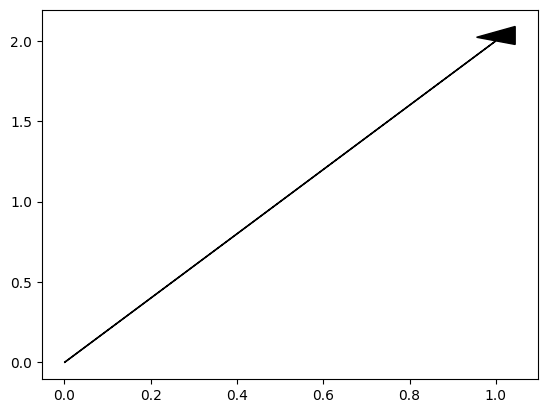

In [11]:
vec = Vector([1, 2])
vec.plot()

### Task 4

Add the ability to use an object of the `Vector` class as a key in the dictionary. E.g.:

```python
d = {
    Vector([1, 2, 3]): 'Vector 1',
    Vector([2, 2, 3]): 'Vector 2'
}
d[Vector([2, 2, 3])]
```

In [12]:
{Vector([1, 2, 3]): 1}

{<Vector([1, 2, 3]) at 0x1194550e140>: 1}

### Task 5

Add functionality:
- division by a scalar (e.g. `Vector([2, 4]) / 2`),
- multiplication by a scalar (e.g. `Vector([2, 4]) * 2`).

> Hint: Remember to handle errors.

In [13]:
vec = Vector([1, 2, 3])

print(vec / 2)
print(vec * 2)
print(vec / 2.1)
print(vec * 2.2)

[0.5, 1.0, 1.5]
[1.0, 2.0, 3.0]
[0.47619047619047616, 0.9523809523809523, 1.4285714285714286]
[1.0476190476190477, 2.0952380952380953, 3.1428571428571432]


In [14]:
print(vec / 0)

ArithmeticError: Can not divide by 0